# Explanatory - (Prosper Loan Data)
## by (Kwesi Acheampong)

## Investigation Overview
In this project I was based my focus on investigating the dataset to predict Borrower APR and also to find relationships between Prosper Score, Is Homeowner, Stated Monthly Income, and other variables. I also wanted to find the attributes that are associated with Prosper Score. 


## Dataset Overview

 The dataset I chose to work with is called Prosper Loan Data, which was provided by Udacity instructors. The format for this data was comma seperated values(csv). The original dataset contained 113,937 loans with 81 features. Some of the features or attributes are Terms, Borrower APR, Is home owners, Prosper Score, Loan Amount, Loan Status, Stated Monthly Income etc. I then did some cleaning to suit the questions I wanted to investigate. After Cleaning i was left with  84853 loans with 18 features or variables. I did some further cleaning while I was exploring the data

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

In [8]:
#columns needed
t_col =  ['Term', 'LoanStatus', 'BorrowerRate','BorrowerAPR', 'ProsperRating (Alpha)', 'ListingCategory (numeric)','DelinquenciesLast7Years','ProsperScore', 'StatedMonthlyIncome', 'TotalProsperLoans', 'ProsperRating (numeric)','LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors','EmploymentStatus','IsBorrowerHomeowner','DebtToIncomeRatio']

#now get data based on columns to use
new_df=df_loan[t_col]
new_df.head()

#lets drop missing values
new_df.dropna(subset=['ProsperRating (Alpha)'],inplace = True)

In [9]:
#filling these two columns of nan with 0
tp=new_df.TotalProsperLoans
new_df.TotalProsperLoans = tp.fillna(0)
diro=new_df.DebtToIncomeRatio 
new_df.DebtToIncomeRatio  = diro.fillna(0)

In [10]:
bc = sn.color_palette()[0]

##  Insights about Borrower APR
In the dataset, this variable is explained as the cost of credit yearly rate as well as the sum of interest rate. This variable distribution shows 2 peaks of the data ,the first peak has a mode around 0.20 or 20% and the second peak is around 35% or 0.35. Looking at the violin plot it has mean of about 21%.


Text(0.5,0,'Borrower APR')

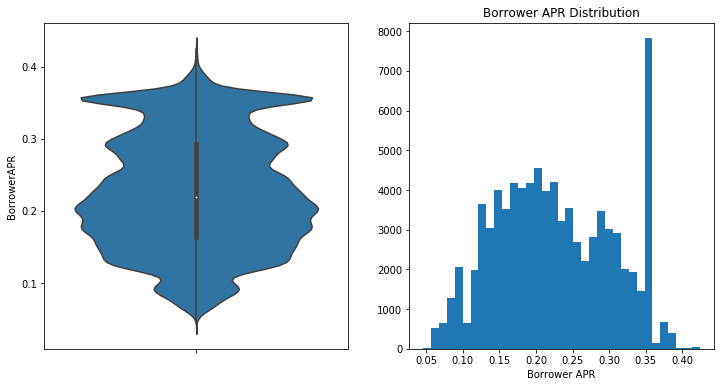

In [11]:
s=[12, 6]
b=35
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'BorrowerAPR', color = bc);

#for histogram of BorrowerAPR
plt.subplot(1,2,2)
plt.hist(data=new_df, x='BorrowerAPR', bins=b);
t='Borrower APR Distribution'
plt.title(t);
xt='Borrower APR'
plt.xlabel(xt)

## Insights about Loan Original Amount
This variable has high number of the borrowers get loans that is lesser than 5000 and this can be seen clearly by looking the violin plot.

Text(0.5,0,'LoanOriginalAmount')

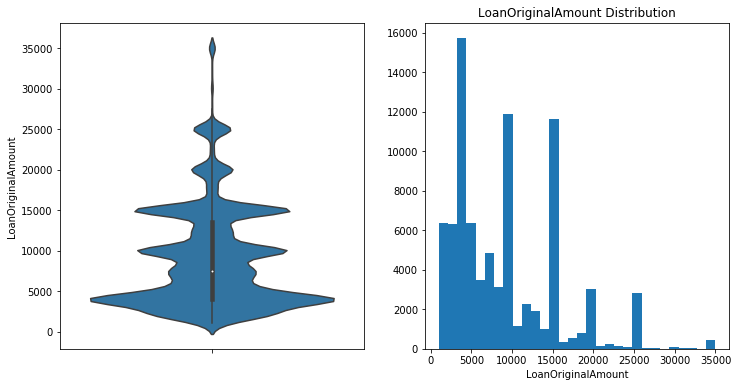

In [12]:
s=[12, 6]
b=30
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'LoanOriginalAmount', color = bc);

#for histogram of 'LoanOriginalAmount'
plt.subplot(1,2,2)
plt.hist(data=new_df, x='LoanOriginalAmount', bins=b);
t='LoanOriginalAmount Distribution'
plt.title(t);
xt='LoanOriginalAmount'
plt.xlabel(xt)

## Insights about Prosper Score
From the definition of the variable from the dataset, Prosper Score is the risk score and ranges from 1 to 11. 11 is the best score to get a loan from the company and 1 is the worst. This variable has the mean score at 6.0 and has higher peaks at 4.0,6.0 and 8.0.

Text(0.5,0,'ProsperScore')

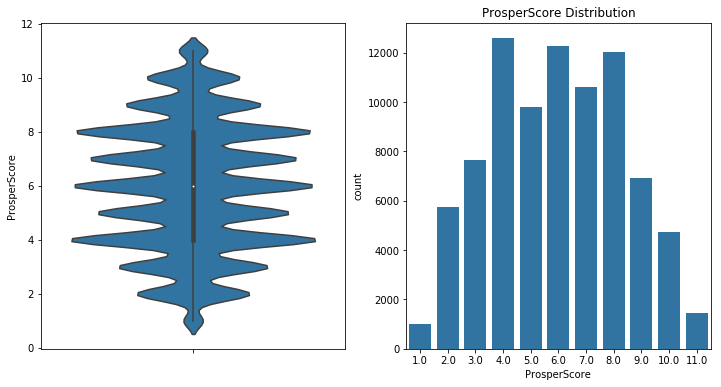

In [13]:
s=[12, 6]
b=35
plt.figure(figsize = s)

#for violing plot
plt.subplot(1,2,1)
sn.violinplot(data = new_df, y = 'ProsperScore', color = bc);

#for histogram of prosperscore
plt.subplot(1,2,2)
sn.countplot(data = new_df, x = 'ProsperScore', color= bc);
t='ProsperScore Distribution'
plt.title(t);
xt='ProsperScore'
plt.xlabel(xt)

## Insights about Is Home owner
This variable talks about a borrower being a home owner or not. From the figure below, most people that borrow money are homeowners and they are more than 40,000.

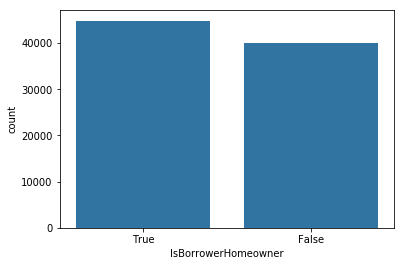

In [14]:
soo =new_df['IsBorrowerHomeowner']
so=soo.value_counts().index
sn.countplot(data = new_df, x ='IsBorrowerHomeowner' , color = bc,order = so);
s=[7, 4]
plt.figure(figsize = s)

## Insights about Stated Monthly Income
This variable talks about the monthly income for borrowers.A state monthly income of 5000 has the highest borrowing count and the distribution is skewed to the right.

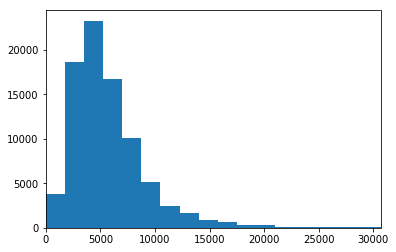

In [15]:
y=3
bs=1000
istd = new_df.StatedMonthlyIncome.std()
iavg = new_df.StatedMonthlyIncome.mean()
b= iavg + istd * y
len(new_df[new_df['StatedMonthlyIncome'] >= b])

plt.hist(data=new_df, x='StatedMonthlyIncome', bins=bs);
plt.xlim(0,b);

## Insights about Borrower APR Vs. Prosper Score
It is shown that a negative correlation exist between Borrower APR and Prosper Score. It indicates that borrowers with lower prosper score pay more for the loan taken

Text(0.5,0,'ProsperScore')

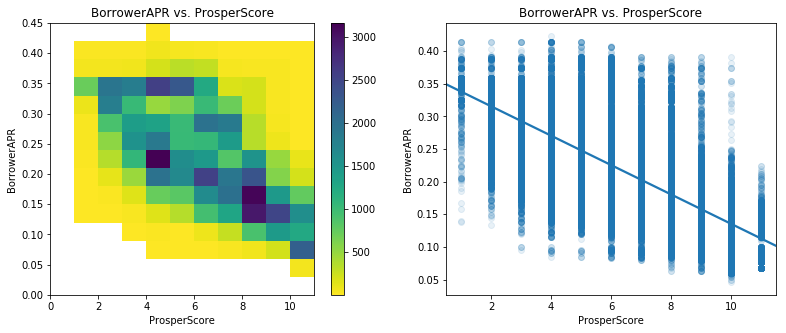

In [16]:
#Borrower APR with Prosper Score
r=[13, 5]
plt.figure(figsize = r) 

plt.subplot(1, 2, 1)
st=0
enx=new_df.ProsperScore.max()
eny=new_df.BorrowerAPR.max()
ix='ProsperScore'
iy='BorrowerAPR'
bx = np.arange(st, enx+1, 1)
by = np.arange(st, eny+0.03, 0.03)
bxy=[bx, by]
plt.hist2d(data =new_df, x = ix, y = iy, bins =bxy , cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
t='BorrowerAPR vs. ProsperScore'
plt.title(t)
y='BorrowerAPR'
plt.ylabel(y)
x='ProsperScore'
plt.xlabel(x);



plt.subplot(1, 2, 2)
k={'alpha' : 1/10}
sn.regplot(data =new_df, x = ix, y = iy, scatter_kws = k);
plt.title('BorrowerAPR vs. ProsperScore')
plt.ylabel(y)
plt.xlabel(x)

## Borrower APR Vs. Stated Monthly Income
Because stated monthly income is huge and has a lot of outliers, i will restrict my income to the origional loan amount which is 35000 dollars. After that, it is clearly seen that there is negative linear relationship between Borrower APR and Stated monthly income.

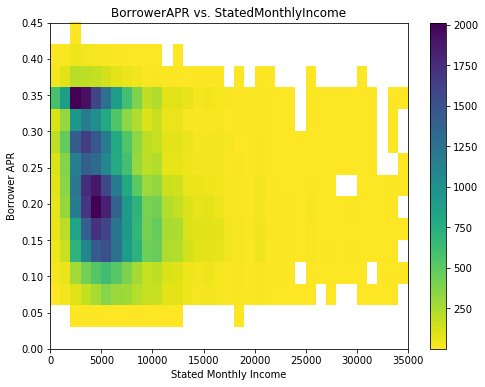

In [17]:
con=new_df.StatedMonthlyIncome
new_df = new_df[ con< 35000]

s=[8, 6]
plt.figure(figsize =s ) 
r=0
enx=new_df.StatedMonthlyIncome.max()
eny=new_df.BorrowerAPR.max()
q=1000
p=0.03
bx = np.arange(r,enx+q, q)
by = np.arange(r, eny+p, p)
ux='StatedMonthlyIncome'
uy='BorrowerAPR'
b=[bx, by]
e= 0.5
plt.hist2d(data = new_df, x =ux , y =uy , bins =b ,cmap = 'viridis_r', cmin =e)
plt.colorbar()
tt='BorrowerAPR vs. StatedMonthlyIncome'
plt.title(tt)
yt='Borrower APR'
plt.ylabel(yt)
xt='Stated Monthly Income'
plt.xlabel(xt);

## Borrower APR Vs. Debt to Income Ratio
Debt to income ratio is having the same issue as state monthly income, so we limited it to less than 1. After the limiting was done, It could be seen from the heat map that there is a weak positive correlation between Borrower APR and Debt to income ratio

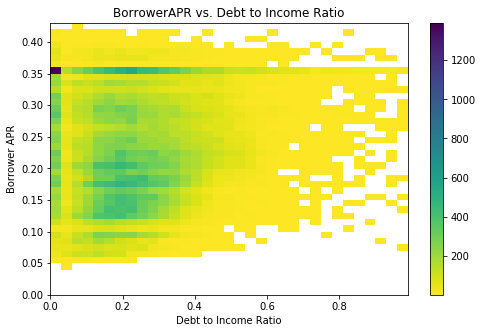

In [18]:
cd=new_df.DebtToIncomeRatio
new_df = new_df[ cd< 1]

s=[8, 5]
plt.figure(figsize = s) 
r=0
rx=0.03
ry=0.01
enx=new_df.DebtToIncomeRatio.max()
eny=new_df.BorrowerAPR.max()
bx = np.arange(0,enx +rx, rx)
by = np.arange(0, eny+ry, ry)
b=[bx, by]
cm=0.5
ux='DebtToIncomeRatio'
uy='BorrowerAPR'
plt.hist2d(data = new_df, x = ux, y = uy, bins =b ,cmap = 'viridis_r', cmin = cm)
plt.colorbar();
tt='BorrowerAPR vs. Debt to Income Ratio'
plt.title(tt)
ty='Borrower APR'
plt.ylabel(ty)
tx='Debt to Income Ratio'
plt.xlabel(tx);

## Borrower APR Vs Term
The figure shows that people in the 36 month term has the highest Borrower APR. This simply defines how borrowers take loans for a longer time.

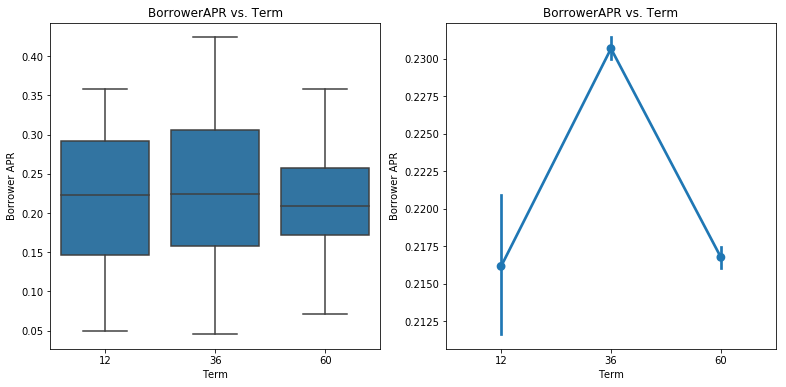

In [19]:
#Borrower APR with Term
s= [13, 6]
plt.figure(figsize =s) 

plt.subplot(1, 2, 1)
ux='Term'
uy=uy
sn.boxplot(data = new_df, x =ux , y = uy, color = bc);
tt='BorrowerAPR vs. Term'
plt.title(tt)
yt='Borrower APR'
plt.ylabel(yt)
xt='Term'
plt.xlabel(xt);

plt.subplot(1, 2, 2)
sn.pointplot(data = new_df, x = ux, y = uy);
plt.title(tt)
plt.ylabel(yt)
plt.xlabel(xt);

## Prosper score Vs Stated Monthly incomes
As seen from the scatter plot below, Prosper Score and state monthly income are weakly positive correlated.

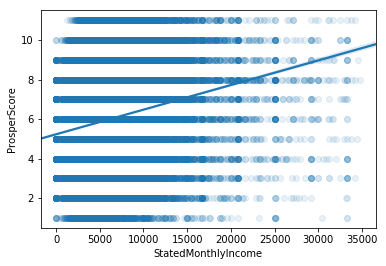

In [20]:
#Prosper score with State Monthly incomes
c='StatedMonthlyIncome'
t='ProsperScore'
k={'alpha' : 1/10}
sn.regplot(data = new_df, x =c, y =t , scatter_kws = k);

## Prosper Score Vs Loan Original Amount
 The heat map and scatter plot showed the Prosper Score and loan original amount are weakly positive correlated.

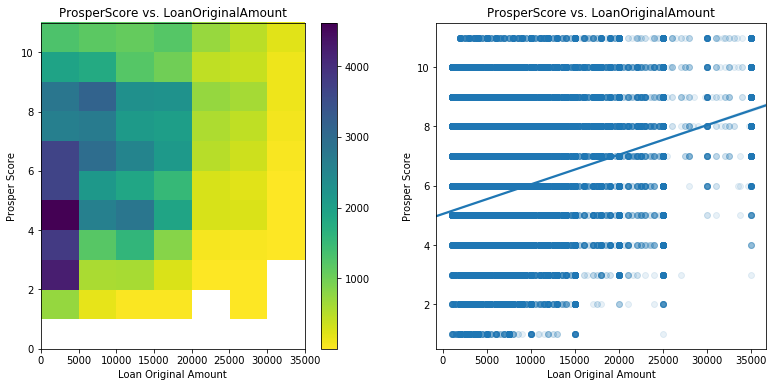

In [21]:
s=[13, 6]
plt.figure(figsize = s);

plt.subplot(1, 2, 1)
enx=new_df.LoanOriginalAmount.max()
eny=new_df.ProsperScore.max()
rx=5000
ry=1
bx = np.arange(0, enx+rx, rx)
by = np.arange(0, eny+ry, ry)
ux='LoanOriginalAmount'
uy= 'ProsperScore'
b=[bx, by]
pt=0.5
plt.hist2d(data = new_df, x =ux , y =uy, bins =b , cmap = 'viridis_r', cmin = pt)
plt.colorbar();
tt='ProsperScore vs. LoanOriginalAmount'
plt.title(tt)
yt='Prosper Score'
plt.ylabel(yt)
xt='Loan Original Amount'
plt.xlabel(xt);



plt.subplot(1, 2, 2)
k={'alpha' : 1/10}
sn.regplot(data =new_df, x = ux, y = uy, scatter_kws =k );
plt.title(tt)
plt.ylabel(yt)
plt.xlabel(xt);


## Prosper Score Vs. Debt To Income Ratio
From the point plot below,  it can be seen that as Prosper score increases, the debt to income ratio decreases.

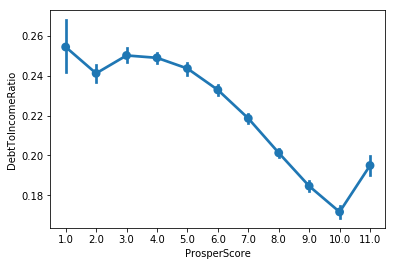

In [22]:
#Prosper Score with Debt To Income Ratio
uy='ProsperScore'
ux='DebtToIncomeRatio'
sn.pointplot(data = new_df, x =uy , y =ux );


##  Term vs  Borrower APR and Prosper Score

It can be seen that the borrowers with a prosper score of 7 for 12 months pay lesser than the other two ters(36 and 60 months).

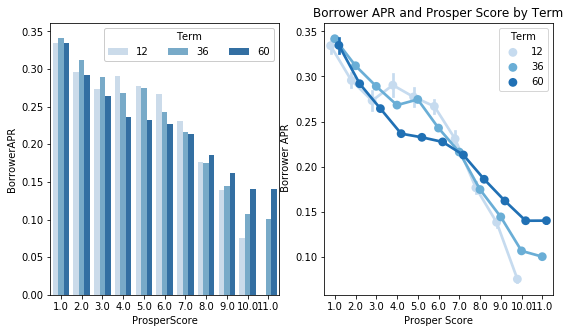

In [23]:
s=[9, 5]
plt.figure(figsize = s)
plt.subplot(1,2,1)
ux='ProsperScore'
uy='BorrowerAPR'
uz='Term'
p='Blues'
r=0
lx = sn.barplot(data = new_df, x =ux , y =uy , hue = uz,  palette=p, errwidth =r);
t=1
c=3
fa=1
lx.legend(loc = t, ncol = c, framealpha = 1, title = uz)

plt.subplot(1,2,2)
b='Blues'
d=0.4
nx = sn.pointplot(data = new_df, x = ux, y = uy, hue = uz,palette =b , dodge = d)
tt='Borrower APR and Prosper Score by Term'
plt.title(tt)
xt='Prosper Score'
plt.xlabel(xt)
yt=' Borrower APR'
plt.ylabel(yt);


##  IsHomeowners vs  Borrower APR and Prosper Score
From the figure, I realized that homeowners have lower Borrower APR than non homeowners as the prosper score is above 1.

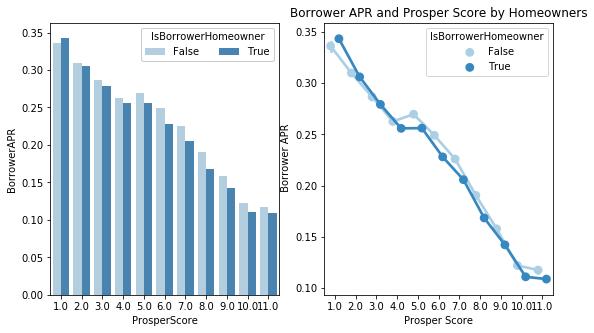

In [24]:
s=[9, 5]
plt.figure(figsize = s)
plt.subplot(1,2,1)
ux='ProsperScore'
uy='BorrowerAPR'
uz='IsBorrowerHomeowner'
p='Blues'
r=0
lx = sn.barplot(data = new_df, x =ux , y =uy , hue = uz,  palette=p, errwidth =r);
t=1
c=3
fa=1
lx.legend(loc = t, ncol = c, framealpha = 1, title = uz)

plt.subplot(1,2,2)
b='Blues'
d=0.4
nx = sn.pointplot(data = new_df, x = ux, y = uy, hue = uz,palette =b , dodge = d)
tt='Borrower APR and Prosper Score by Homeowners'
plt.title(tt)
xt='Prosper Score'
plt.xlabel(xt)
yt=' Borrower APR'
plt.ylabel(yt);


##   Homeownership vs Loan Amount and Prosper score
Home owners take larger loans as their prosper scores increases than non home owners.

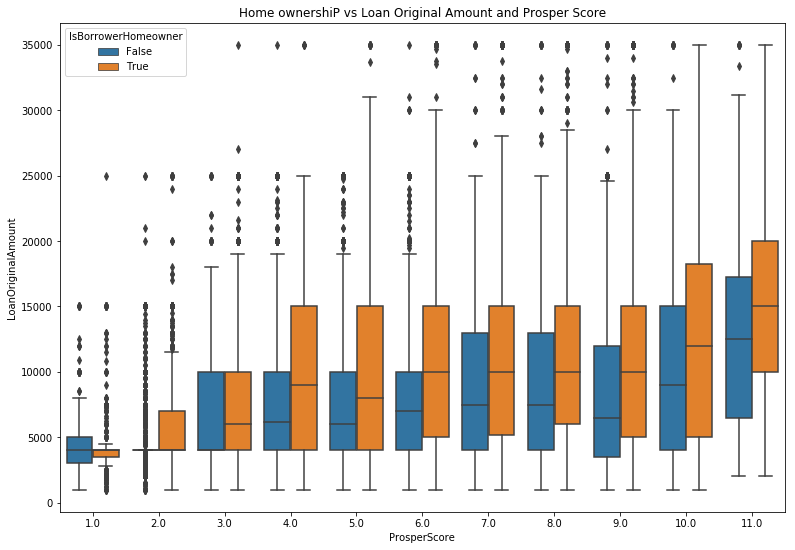

In [25]:
s=[13, 9]
plt.figure(figsize = s)
ux='ProsperScore'
uy='LoanOriginalAmount'
uz='IsBorrowerHomeowner'
sn.boxplot(data=new_df, x=ux, y=uy, hue=uz);
tt='Home ownershiP vs Loan Original Amount and Prosper Score'
plt.title(tt)
plt.ylabel(uy)
plt.xlabel(ux);

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt